In [1]:
from catenets.datasets import load
from src.iterpretability.synthetic_simulate import SyntheticSimulatorLinear
from src.iterpretability.datasets.data_loader import load
from src.iterpretability.utils import attribution_accuracy
import seaborn as sns
import pickle
import pandas as pd 

import numpy as np
from catenets.models.torch import TLearner, SLearner, TARNet, SNet
from src.iterpretability.explain import Explainer
from src.iterpretability.synthetic_experiment import PredictiveSensitivity

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from src.iterpretability.utils import (
    dataframe_line_plot,
)

In [2]:
result_names_to_average = ['All features ACC', 'Pred features ACC', 'Prog features ACC', 'PEHE', 'Factual RMSE', 'Normalized PEHE']

In [3]:
def aggregate_results_and_plot_predictive_sensitivity(dataset, num_important_features, synthetic_simulator_type, binary_outcome, seeds_list):
    results_path = '/Users/ibica/PycharmProjects/ITErpretability/results/predictive_sensitivity'
    results_df_list = []
    for seed in seeds_list:
        results_filename = f"predictive_scale_{dataset}_{num_important_features}_{synthetic_simulator_type}_random_True_binary_{binary_outcome}-seed{seed}.csv"
        results_df_list.append(pd.read_csv(results_path + '/' + results_filename, index_col=None))
    results_df = pd.concat(results_df_list)
    
    #metrics = ['All features ACC', 'Pred features ACC', 'Prog features ACC', 'PEHE', 'Normalized PEHE', 'Factual RMSE']
    metrics = ['Pred features ACC', 'Prog features ACC', 'PEHE']

    for metric in metrics:
        fig = dataframe_line_plot(
            results_df,
            "Predictive Scale",
            metric,
            np.unique(results_df['Explainer']),
            np.unique(results_df['Learner']),
            aggregate=True
            )
        
def aggregate_results_and_plot_nonlinearity_sensitivity(dataset, num_important_features, binary_outcome, seeds_list):
    results_path = '/Users/ibica/PycharmProjects/ITErpretability/results/nonlinearity_sensitivity/random'
    results_df_list = []
    for seed in seeds_list:
        results_filename = f"{dataset}_{num_important_features}_binary_{binary_outcome}-seed{seed}.csv"
        results_df_list.append(pd.read_csv(results_path + '/' + results_filename, index_col=None))
    results_df = pd.concat(results_df_list)
    
    #metrics = ['All features ACC', 'Pred features ACC', 'Prog features ACC', 'PEHE', 'Normalized PEHE', 'Factual RMSE']
    metrics = ['Pred features ACC', 'Prog features ACC', 'PEHE']

    for metric in metrics:
        fig = dataframe_line_plot(
            results_df,
            "Nonlinearity Scale",
            metric,
            np.unique(results_df['Explainer']),
            np.unique(results_df['Learner']),
            aggregate=True
            )
    
def aggregate_results_and_plot_propensity_sensitivity(dataset, num_important_features, binary_outcome, propensity_type, seeds_list):
    results_path = '/Users/ibica/PycharmProjects/ITErpretability/results/propensity_sensitivity/linear'
    results_df_list = []
    for seed in seeds_list:
        results_filename = f"propensity_scale_{dataset}_{num_important_features}_proptype_{propensity_type}_predscl_1.0_nonlinscl_0_trainratio_0.8_binary_{binary_outcome}-seed{seed}.csv"
        results_df_list.append(pd.read_csv(results_path + '/' + results_filename, index_col=None))
    results_df = pd.concat(results_df_list)
    
    #metrics = ['All features ACC', 'Pred features ACC', 'Prog features ACC', 'PEHE', 'Normalized PEHE', 'Factual RMSE']
    metrics = ['Pred features ACC', 'PEHE']

    for metric in metrics:
        fig = dataframe_line_plot(
            results_df,
            "Propensity Scale",
            metric,
            np.unique(results_df['Explainer']),
            np.unique(results_df['Learner']),
            aggregate=True
            )

# Linear + random

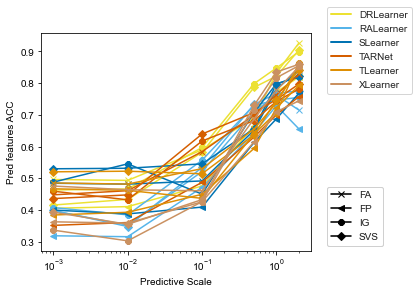

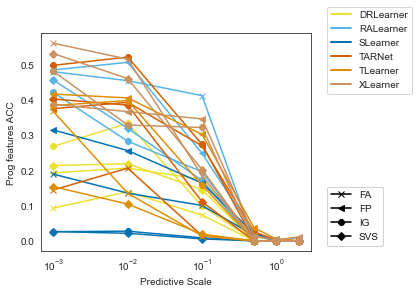

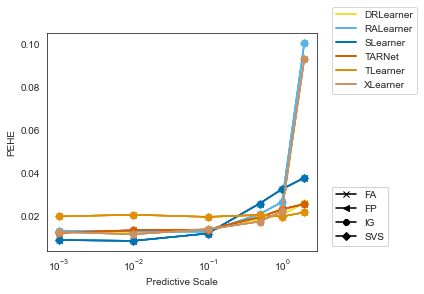

In [4]:
seeds_list = [1, 2]
aggregate_results_and_plot_predictive_sensitivity('tcga_20', 4, 'linear', 'False', seeds_list)

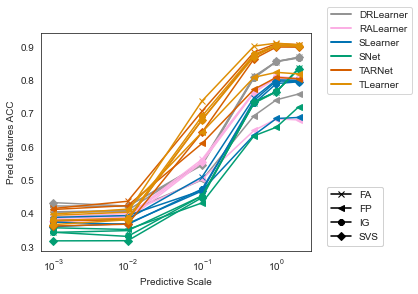

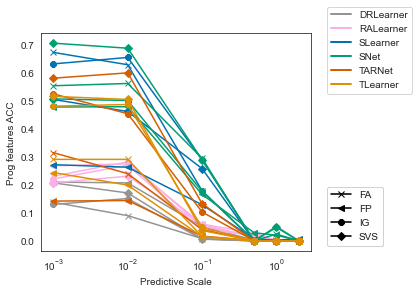

In [53]:
aggregate_results_and_plot_predictive_sensitivity('tcga_100', 20, 'linear', 'False', seeds_list)

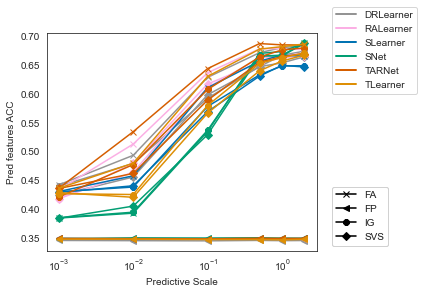

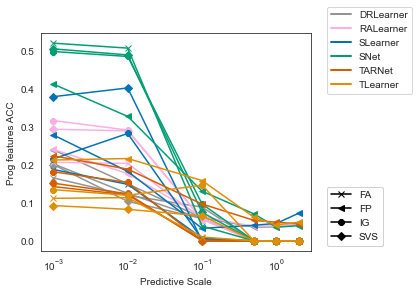

In [54]:
aggregate_results_and_plot_predictive_sensitivity('twins', 8, 'linear', 'False', seeds_list)

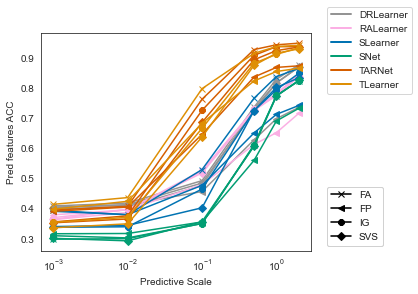

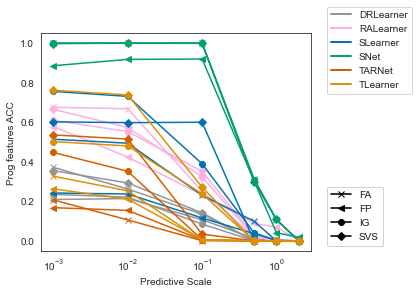

In [55]:
aggregate_results_and_plot_predictive_sensitivity('news_100', 20, 'linear', 'False', seeds_list)

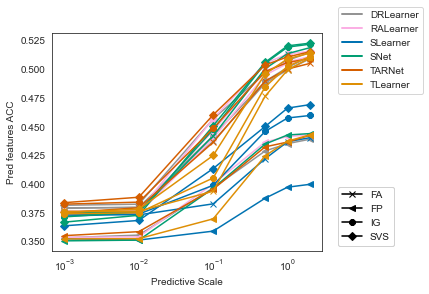

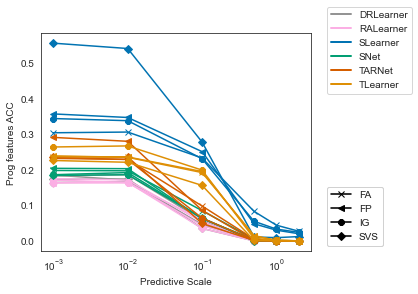

In [56]:
aggregate_results_and_plot_predictive_sensitivity('acic', 10, 'linear', 'False', seeds_list)

# Non-linear sensitivity

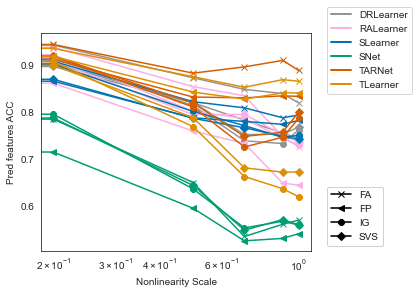

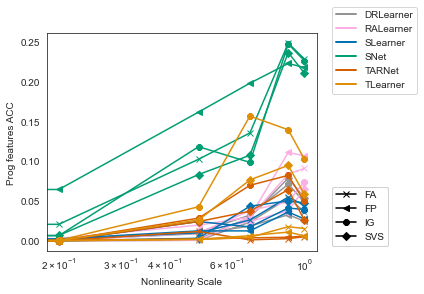

In [57]:
aggregate_results_and_plot_nonlinearity_sensitivity('tcga_20', 4, 'False', seeds_list)

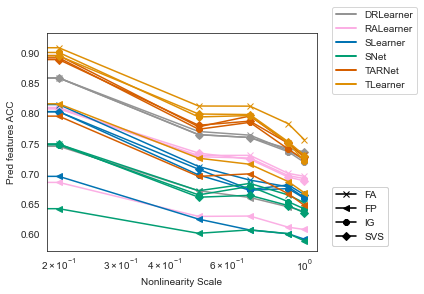

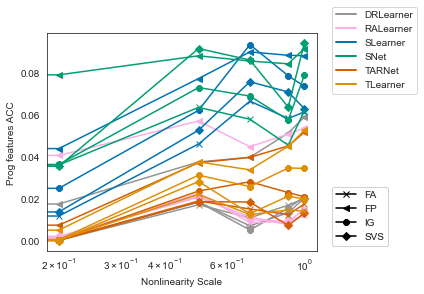

In [58]:
aggregate_results_and_plot_nonlinearity_sensitivity('tcga_100', 20, 'False', seeds_list)

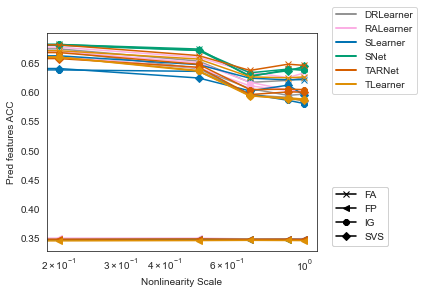

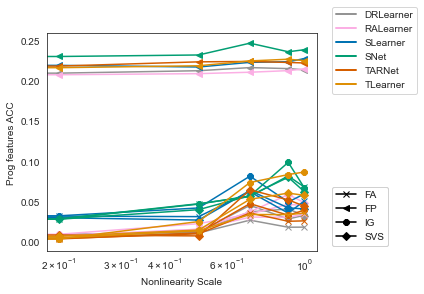

In [59]:
aggregate_results_and_plot_nonlinearity_sensitivity('twins', 8, 'False', seeds_list)

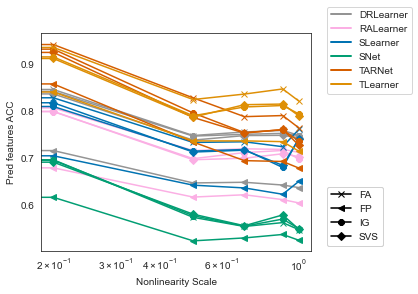

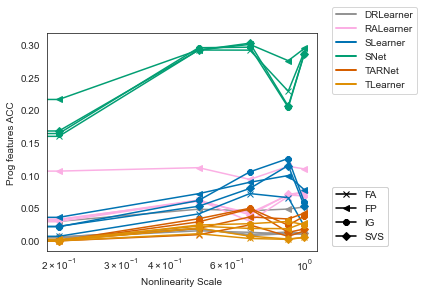

In [60]:
aggregate_results_and_plot_nonlinearity_sensitivity('news_100', 20, 'False', seeds_list)

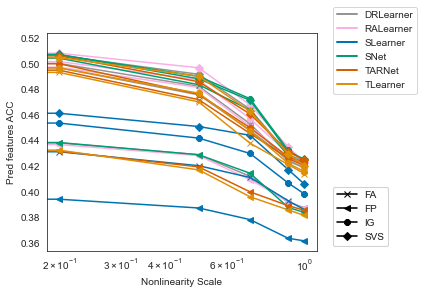

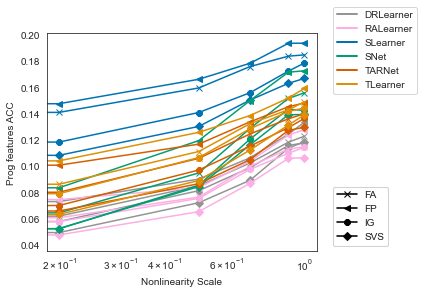

In [61]:
aggregate_results_and_plot_nonlinearity_sensitivity('acic', 10, 'False', seeds_list)

# Propensity sensitivity

In [89]:
propensity_type = 'pred'

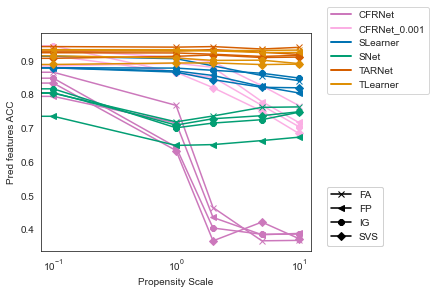

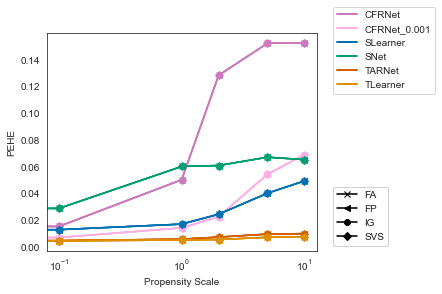

In [90]:
aggregate_results_and_plot_propensity_sensitivity('tcga_20', 4, 'False', propensity_type=propensity_type, seeds_list=seeds_list)

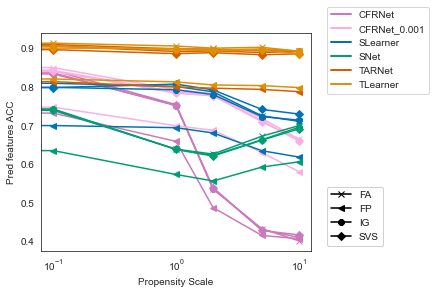

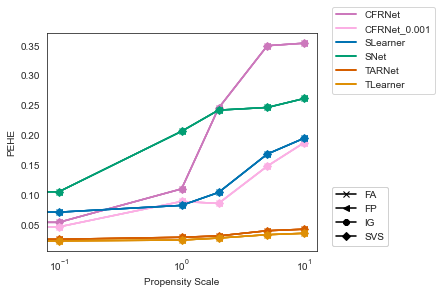

In [91]:
aggregate_results_and_plot_propensity_sensitivity('tcga_100', 20, 'False', propensity_type=propensity_type, seeds_list=seeds_list)

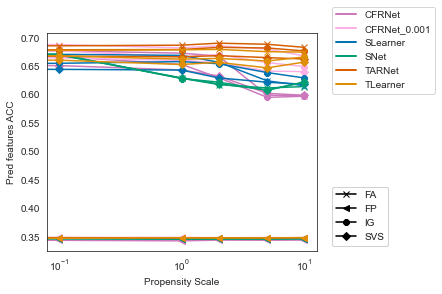

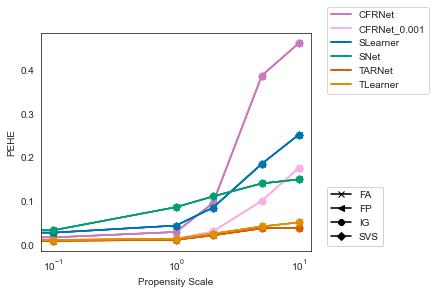

In [92]:
aggregate_results_and_plot_propensity_sensitivity('twins', 8, 'False', propensity_type=propensity_type, seeds_list=seeds_list)

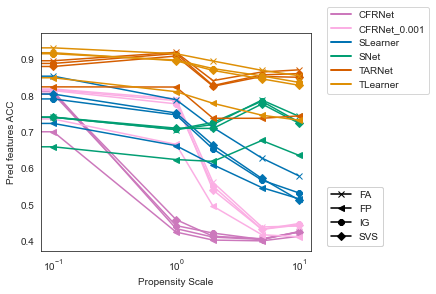

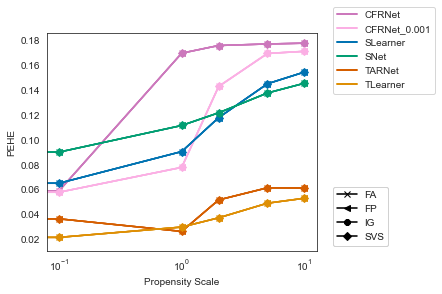

In [93]:
aggregate_results_and_plot_propensity_sensitivity('news_100', 20, 'False', propensity_type=propensity_type, seeds_list=seeds_list)

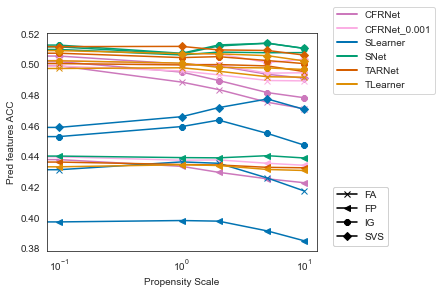

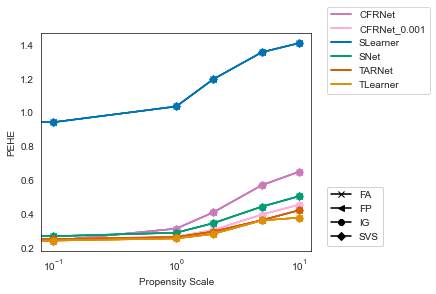

In [94]:
aggregate_results_and_plot_propensity_sensitivity('acic', 10, 'False', propensity_type=propensity_type, seeds_list=seeds_list)

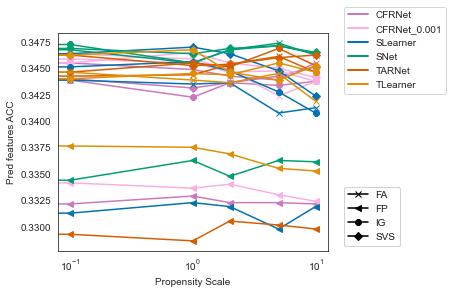

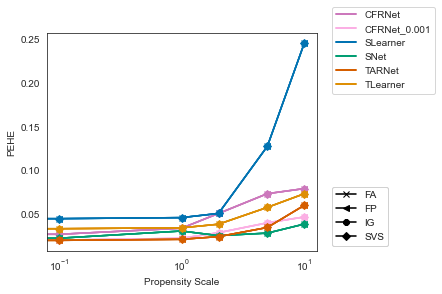

In [97]:
aggregate_results_and_plot_propensity_sensitivity('covid', 4, 'False', propensity_type='irrelevant_var', seeds_list=seeds_list)

# Linear + least correlated 

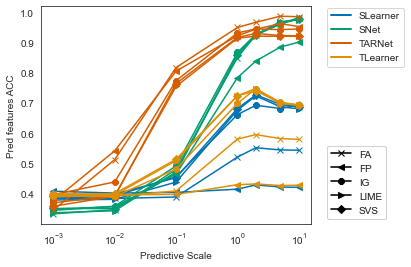

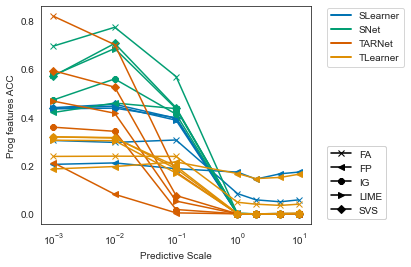

In [81]:
aggregate_results_and_plot('tcga_20', 4, 'linear', 'False', seeds_list)

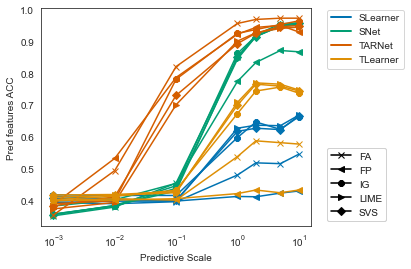

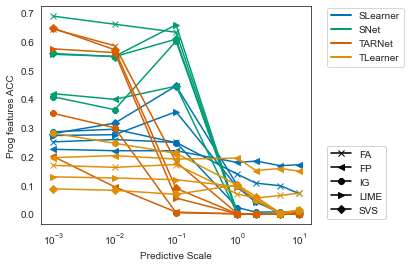

In [82]:
aggregate_results_and_plot('tcga_20', 4, 'linear_least_correlated', 'False', seeds_list)

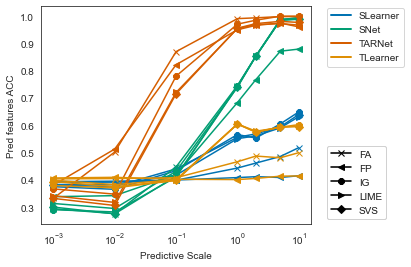

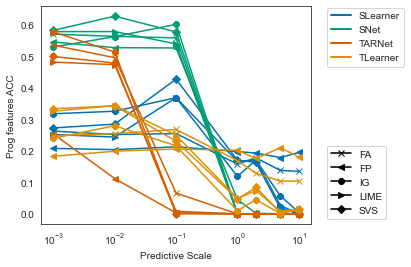

In [83]:
aggregate_results_and_plot('tcga_20', 4, 'linear_most_correlated', 'False', seeds_list)

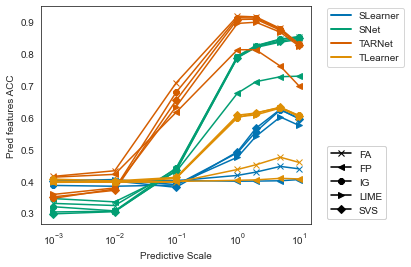

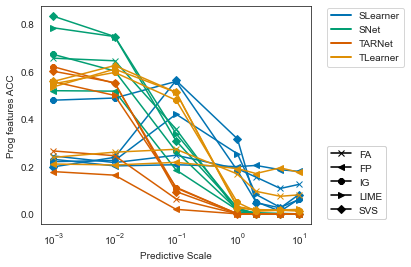

In [84]:
aggregate_results_and_plot('tcga_100', 20, 'linear', 'False', seeds_list)

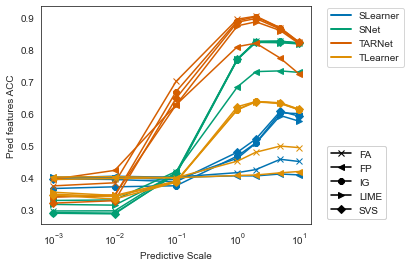

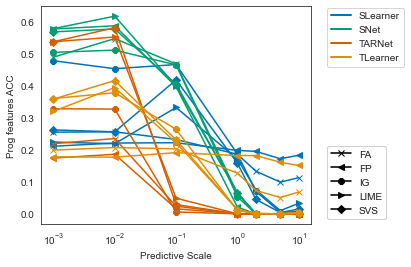

In [85]:
aggregate_results_and_plot('tcga_100', 20, 'linear_least_correlated', 'False', seeds_list)

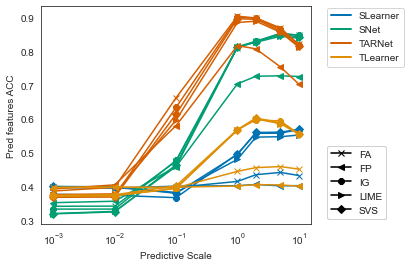

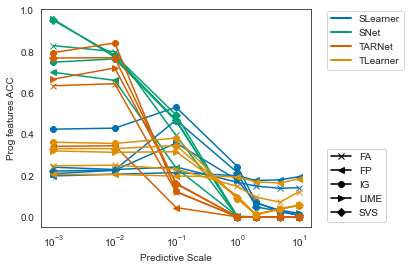

In [86]:
aggregate_results_and_plot('tcga_100', 20, 'linear_most_correlated', 'False', seeds_list)